# Poisson equation numerically

The code is solving a boundary value problem (BVP) using a numerical method. Specifically, it is solving the Poisson's equation,

u''(x) = f(x), a <= x <= b,

where u(a) = u_a and u(b) = u_b are the boundary conditions.

To solve this equation numerically, the code discretizes the domain [a,b] into N evenly spaced points using numpy's linspace() function. It then defines the right-hand side function f(x) and the exact solution of the BVP using Python functions.

Next, the code discretizes the equation using a second-order central difference scheme to obtain a system of linear equations in the form of Au = b, where A is a tridiagonal matrix of size N x N, u is the solution vector, and b is the vector containing the boundary conditions and the discretized right-hand side function. The details of this discretization are given in the code.

Finally, the code solves the system of linear equations using numpy's linalg.solve() function and plots the numerical solution and the exact solution using matplotlib.

Total time of run: 0.0
Total time of run: 0.0010287761688232422
Total time of run: 0.0
Total time of run: 0.0
Total time of run: 0.0
Total time of run: 0.0


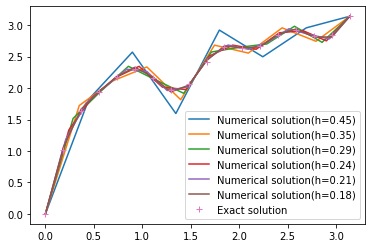

In [40]:
plt.figure()
import numpy as np
import matplotlib.pyplot as plt
import time
for i in range(4,10):
    s = time.time()
    # Define the domain
    a, b = 0, np.pi
    N = 2*i
    x = np.linspace(a, b, N)

    # Define the right-hand side function
    f = lambda x: np.sin(8*x)*8 + sum([i * np.sin(i*x) for i in range(1, 5)])

    # Define the boundary conditions
    u_a, u_b = 0, np.pi

    # Define the exact solution
    def exact(x):
        return x + sum([np.sin(i * x) / i for i in range(1, 5)]) + np.sin(8 * x) / 8

    # Define the discretization
    h = x[1] - x[0]
    A = np.zeros((N, N))
    b = np.zeros(N)
    for i in range(1, N-1):
        A[i, i-1] = 1
        A[i, i] = -2
        A[i, i+1] = 1
        b[i] = -f(x[i]) * h**2
    A[0, 0] = 1
    A[N-1, N-1] = 1
    b[0] = u_a
    b[-1] = u_b

    # Solve the system of equations
    u = np.linalg.solve(A, b)
    e = time.time()
    print('Total time of run:',e - s)
    # Plot the solution
    plt.plot(x, u, '-' ,label="Numerical solution(h={})".format(round(h,2)))
    
    plt.legend()
    #plt.show()
plt.plot(x, exact(x), '+', label="Exact solution")
plt.legend()

Total time of run: 0.0


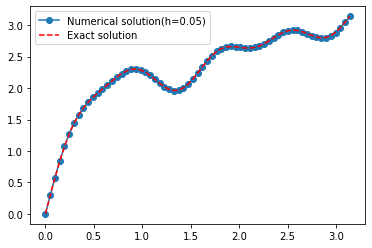

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import time

s = time.time()
# Define the domain
a, b = 0, np.pi
N = 65
x = np.linspace(a, b, N)

# Define the right-hand side function
f = lambda x: np.sin(8*x)*8 + sum([i * np.sin(i*x) for i in range(1, 5)])

# Define the boundary conditions
u_a, u_b = 0, np.pi

# Define the exact solution
def exact(x):
    return x + sum([np.sin(i * x) / i for i in range(1, 5)]) + np.sin(8 * x) / 8

# Define the discretization
h = x[1] - x[0]
A = np.zeros((N, N))
b = np.zeros(N)
for i in range(1, N-1):
    A[i, i-1] = 1
    A[i, i] = -2
    A[i, i+1] = 1
    b[i] = -f(x[i]) * h**2
A[0, 0] = 1
A[N-1, N-1] = 1
b[0] = u_a
b[-1] = u_b

# Solve the system of equations
u = np.linalg.solve(A, b)
e = time.time()
print('Total time of run:',e - s)
# Plot the solution
plt.plot(x, u, '-o' ,label="Numerical solution(h={})".format(round(h,2)))
plt.plot(x, exact(x), 'r--', label="Exact solution")
plt.legend()
plt.show()


# Poisson equation using PINNs

The code below is solving a boundary value problem (BVP) for the Poisson's equation using deep learning-based method called Physics-Informed Neural Networks (PINNs). Specifically, it is solving the Poisson's equation same as above

Specifically, it solves the following PDE:
-d^2u/dx^2 - (sin(x) + 2sin(2x) + 3sin(3x) + 4sin(4x))u(x) - 8sin(8x) = 0,

on the domain [0, pi], subject to the boundary conditions u(0) = 0 and u(pi) = pi.

To solve this equation using PINNs, the code defines the geometry of the problem using deepxde.geometry.Interval() function, which specifies that the problem is defined on the interval [0, pi].

Next, the code defines the PDE using a Python function pde(x, y), where x is the input variable and y is the predicted solution. The function calculates the second derivative of y using deepxde.grad.hessian() function and adds the right-hand side function f(x), which is a summation of sine functions, to obtain the full PDE. 

The code also defines the exact solution of the BVP using a Python function func(x), which is used to generate the training data.

Then, the code creates a dde.data.PDE object, which represents the training data for the problem. The object is initialized with the geometry, PDE, and the exact solution, and is used to generate the training data using num_domain=64 and num_test=400.

Next, the code defines a neural network using deepxde.nn.FNN() function with a 4-layer fully connected network of 50 neurons in each layer and "tanh" activation function. The network is trained using the Adam optimizer with a learning rate of 1e-4 and inverse time decay with a decay rate of 0.3 and decay step of 1000. The training is performed for 30000 iterations.

Finally, the code applies an output transform function to the predicted solution to enforce the boundary conditions, and plots the training loss history and training state using deepxde.saveplot() function.

Using backend: tensorflow.compat.v1



Instructions for updating:
non-resource variables are not supported in the long term

Compiling model...
Building feed-forward neural network...
'build' took 0.053089 s



C:\Users\mayur\anaconda3\lib\site-packages\deepxde\nn\tensorflow_compat_v1\fnn.py:103: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 0.533676 s

Initializing variables...
Training model...

Step      Train loss    Test loss     Test metric   
0         [4.37e+01]    [4.37e+01]    [5.17e-01]    
1000      [2.86e+01]    [2.87e+01]    [6.79e-02]    
2000      [1.09e+01]    [1.11e+01]    [3.07e-02]    
3000      [1.15e+00]    [1.52e+00]    [9.43e-03]    
4000      [4.88e-02]    [8.35e-02]    [5.92e-03]    
5000      [1.13e-02]    [1.97e-02]    [1.03e-03]    
6000      [6.02e-03]    [1.09e-02]    [6.01e-04]    
7000      [2.84e-03]    [5.33e-03]    [3.44e-04]    
8000      [1.51e-03]    [2.68e-03]    [1.63e-04]    
9000      [9.80e-04]    [1.54e-03]    [8.59e-05]    
10000     [6.37e-04]    [9.38e-04]    [5.19e-05]    
11000     [3.86e-04]    [5.32e-04]    [3.17e-05]    
12000     [2.23e-04]    [2.88e-04]    [2.44e-05]    
13000     [1.38e-04]    [1.70e-04]    [1.08e-05]    
14000     [1.01e-04]    [1.22e-04]    [8.85e-06]    
15000     [8.33e-05]    [1.02e-04]    [7.31e-06]    
16000     [7.22e-05]    [9.

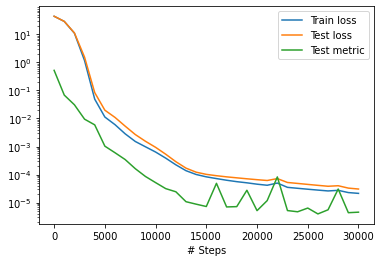

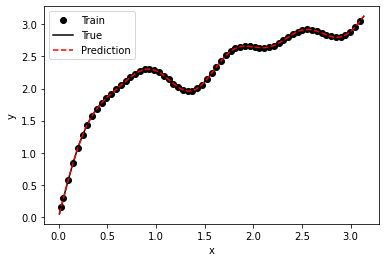

In [2]:
import deepxde as dde
import numpy as np
import time
s = time.time()
geom = dde.geometry.Interval(0, np.pi)


# Define sine function
if dde.backend.backend_name in ["tensorflow.compat.v1", "tensorflow"]:
    from deepxde.backend import tf

    sin = tf.sin
elif dde.backend.backend_name == "paddle":
    import paddle

    sin = paddle.sin


def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    summation = sum([i * sin(i * x) for i in range(1, 5)])
    return -dy_xx - summation - 8 * sin(8 * x)

def func(x):
    summation = sum([np.sin(i * x) / i for i in range(1, 5)])
    return x + summation + np.sin(8 * x) / 8

data = dde.data.PDE(geom, pde, [], num_domain=64, solution=func, num_test=400)

layer_size = [1] + [50] * 3 + [1]
activation = 'tanh'
initializer = 'Glorot uniform'
net = dde.nn.FNN(layer_size, activation, initializer)

def output_transform(x, y):
    return x * (np.pi - x) * y + x

net.apply_output_transform(output_transform)

model = dde.Model(data, net)
model.compile("adam", lr=1e-4, decay=("inverse time", 1000, 0.3), metrics=["l2 relative error"])

losshistory, train_state = model.train(iterations=30000)
e = time.time()
print('Total time of run:',e - s)
dde.saveplot(losshistory, train_state, issave=True, isplot=True)